In [1]:
# LDA(Linear Discriminant Analysis)
# 지도 학습 기반의 차원 축소 기법
# 각 클래스가 다변량 정규분포를 따른다고 가정하며, 동일한 공분산 행렬을 가진다고 전제
# 각 클래스는 공통된 공분산 행렬을 갖는 다변량 정규분포(Multivariate Gaussian) 를 따른다.


# 클래스에 대한 공분산을 구한다.
# 클래스 간 산포도를 최대로 하는 축을 찾는다.
# 클래스 간의 분산을 최대화하고 클래스 내 분산을 최소화
# PCA와 달리 레이블 정보(y값)을 사용
# 주로 분류 문제 전처리나 시각화 목적으로 사용
# 클래스 간 산포 행렬과 클래스 내 산포 행렬을 사용하여 고윳값 분해를 수행

# LDA의 첫 번째 축은 클래스 내 분산을 최소화하면서 클래스 간 분산을 최대화하는 방향
# LDA의 첫 번째 축은 클래스 내 분산이 최소화되는 축이 아님.

# LDA는 공분산 행렬이 가역적(정칙)이라는 전제가 있으며, 다중공선성(특성 간 상관성)이 높으면 성능 저하가 발생
# 클래스 간 분산 행렬과 클래스 내 분산 행렬의 비율을 최대화하는 방식으로 선형 판별 축을 찾는다.

# LDA는 독립변수(X)와 종속변수(y) 사이에 상관관계가 있어야 잘 작동
# LDA가 독립변수 X를 종속변수(레이블, y)로 잘 분류할 수 있도록 데이터의 변환 축을 찾는 방법임.
# 상관관계가 클수록 클래스 간 평균 차이가 커지고 (SB 증가), 클래스 내 분산은 작게 (SW 감소) 된다.

# LDA는 클래스(종속변수)를 구분하기 위해 독립변수와 종속변수 사이에 어느 정도 상관관계가 있을 때 효과적

In [ ]:
3 Sw⁻¹Sb를 Σ (전체 공분산)로 대체할 경우, LDA는 PCA와 유사한 결과를 낼 수 있다.

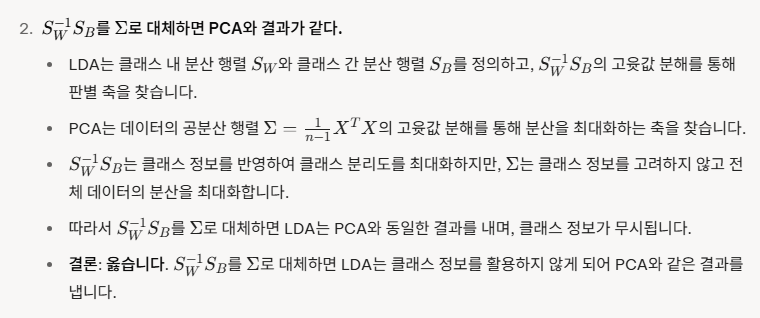

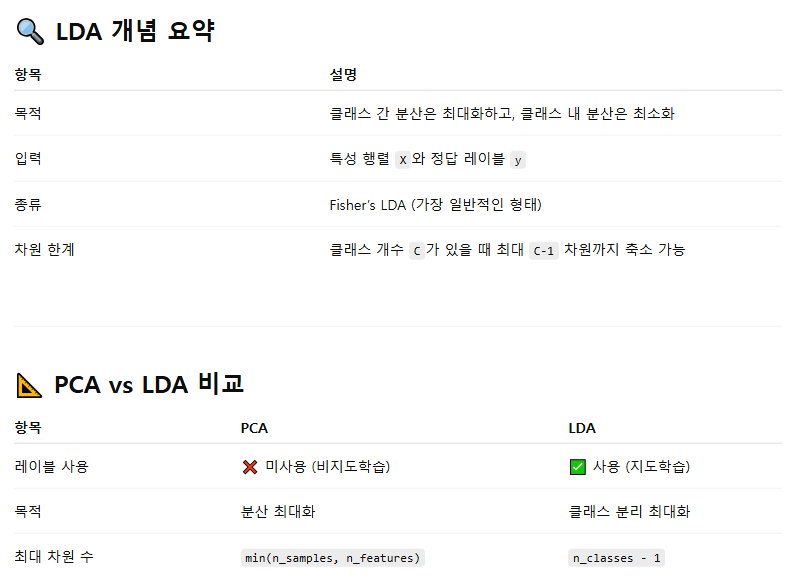

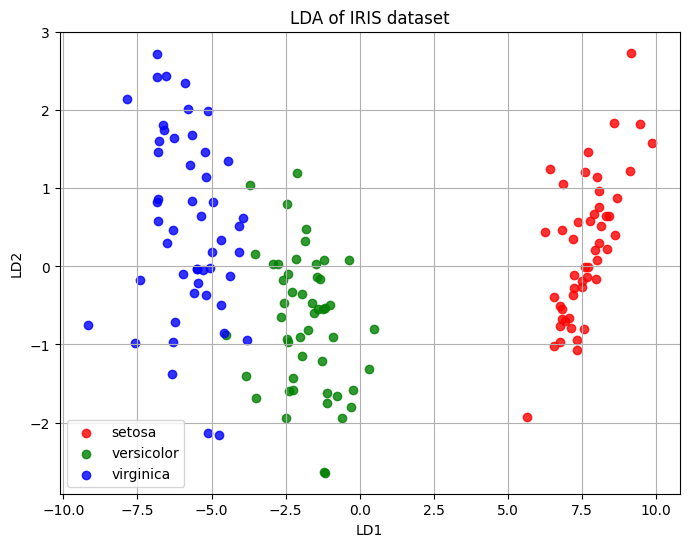

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 데이터 로드
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# LDA 수행
lda = LDA(n_components=2)
X_r2 = lda.fit_transform(X, y)

# 시각화
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title('LDA of IRIS dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.grid()
plt.show()

In [ ]:
# S_B : 클래스 간 산포
# S_B 역할 : w로 투사 했을 때, 다른 클래스 간의 거리가 멀어진다.

# S_W : 클래스 내 산포

### LDA에 필요한 행렬
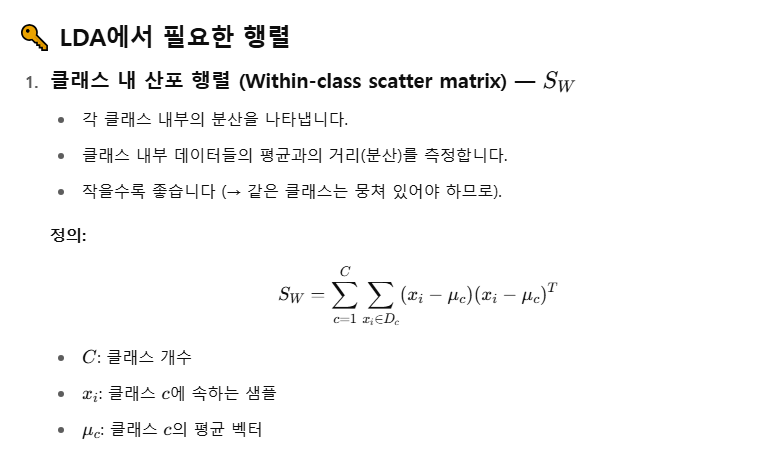
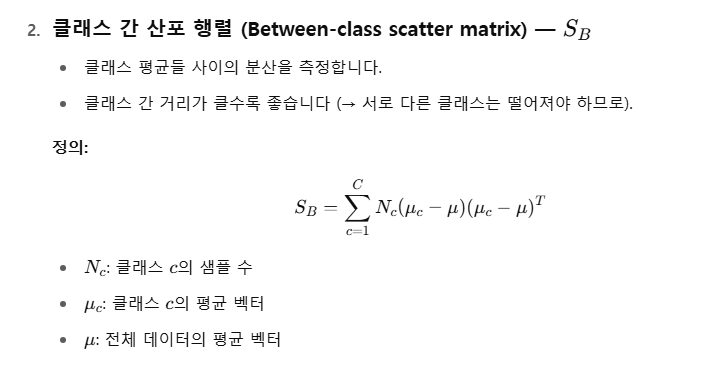
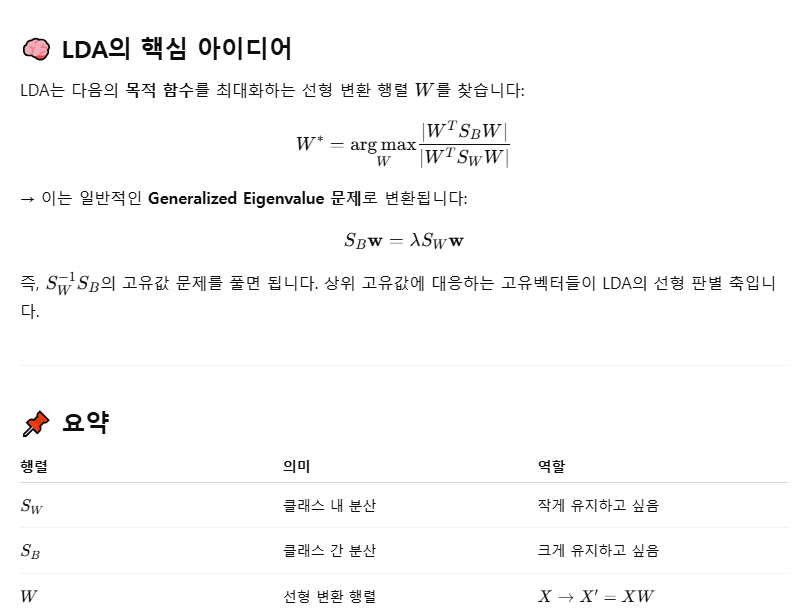

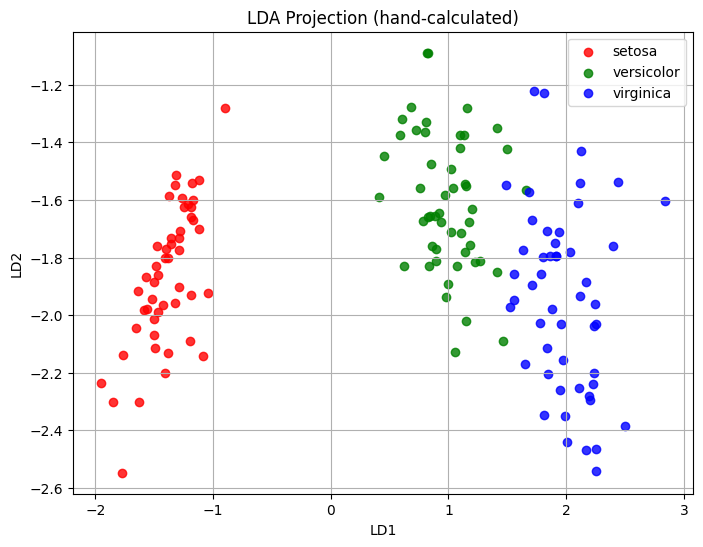

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from numpy.linalg import inv, eig

# 데이터 로드
data = load_iris()
X = data.data
y = data.target
class_labels = np.unique(y)

# 전체 평균
mean_overall = np.mean(X, axis=0)

# 클래스 수
n_classes = len(class_labels)
n_features = X.shape[1]

# 클래스 내 산포 행렬 (S_W) 초기화
S_W = np.zeros((n_features, n_features))

# 클래스 간 산포 행렬 (S_B) 초기화
S_B = np.zeros((n_features, n_features))

for c in class_labels:
    X_c = X[y == c]
    mean_c = np.mean(X_c, axis=0)
    # 클래스 내 산포 행렬
    S_W += np.dot((X_c - mean_c).T, (X_c - mean_c))
    
    # 클래스 간 산포 행렬
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    S_B += n_c * np.dot(mean_diff, mean_diff.T)

# 일반화된 고유값 문제: S_W^{-1} * S_B
eigvals, eigvecs = eig(inv(S_W).dot(S_B))

# 고유값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(-eigvals.real)
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# 선형 판별 벡터 W (여기선 상위 2개 사용)
W = eigvecs[:, :2]  # (n_features x 2)

# LDA 차원 축소
X_lda = X.dot(W)

# 결과 시각화
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i, c in enumerate(class_labels):
    plt.scatter(X_lda[y == c, 0], X_lda[y == c, 1], alpha=0.8, color=colors[i], label=data.target_names[i])
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection (hand-calculated)")
plt.legend()
plt.grid()
plt.show()

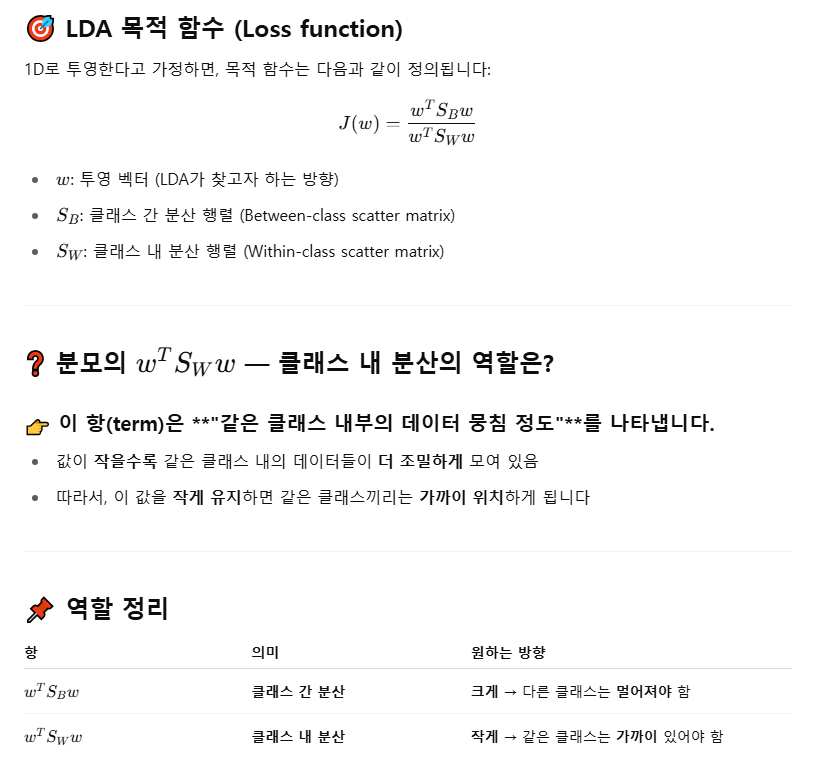

In [ ]:
# LDA vs PCA
# LDA와 PCA의 축 방향은 같다.
# PCA는 전체 데이터의 분산을 최대한 보존하는 방향을 찾고,
# LDA는 클래스 간 분산을 최대화하고 클래스 내 분산을 최소화하는 방향을 찾는다.
# 따라서 두 방법의 목적 함수도, 찾는 축의 방향도 다르다.

